<a href="https://colab.research.google.com/github/Check-Your-Skin/checkyourskin-ml_model/blob/update-plots/HAM_10000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [14]:
from google.colab import drive
import pandas as pd
import tensorflow as tf
import datetime, os
import seaborn as sns
import matplotlib.pyplot as plt


# Mount Drive

In [15]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Understanding


In [16]:
file_path = '/content/drive/My Drive/archive/HAM10000_metadata.csv'
df = pd.read_csv(file_path)
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [17]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


## Verteilung der Klassen

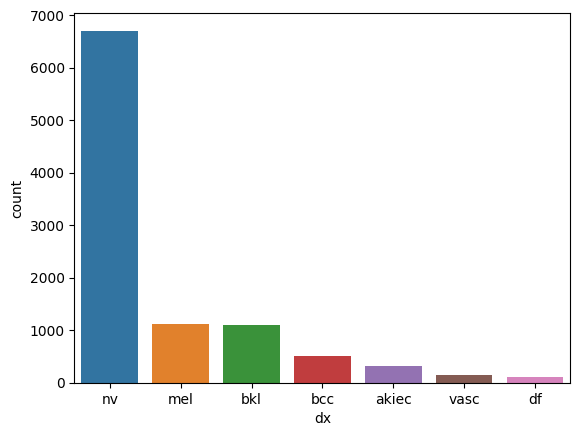

In [32]:
res = sns.countplot(x=df['dx'], order=df['dx'].value_counts().index)
plt.show()

In [33]:
df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

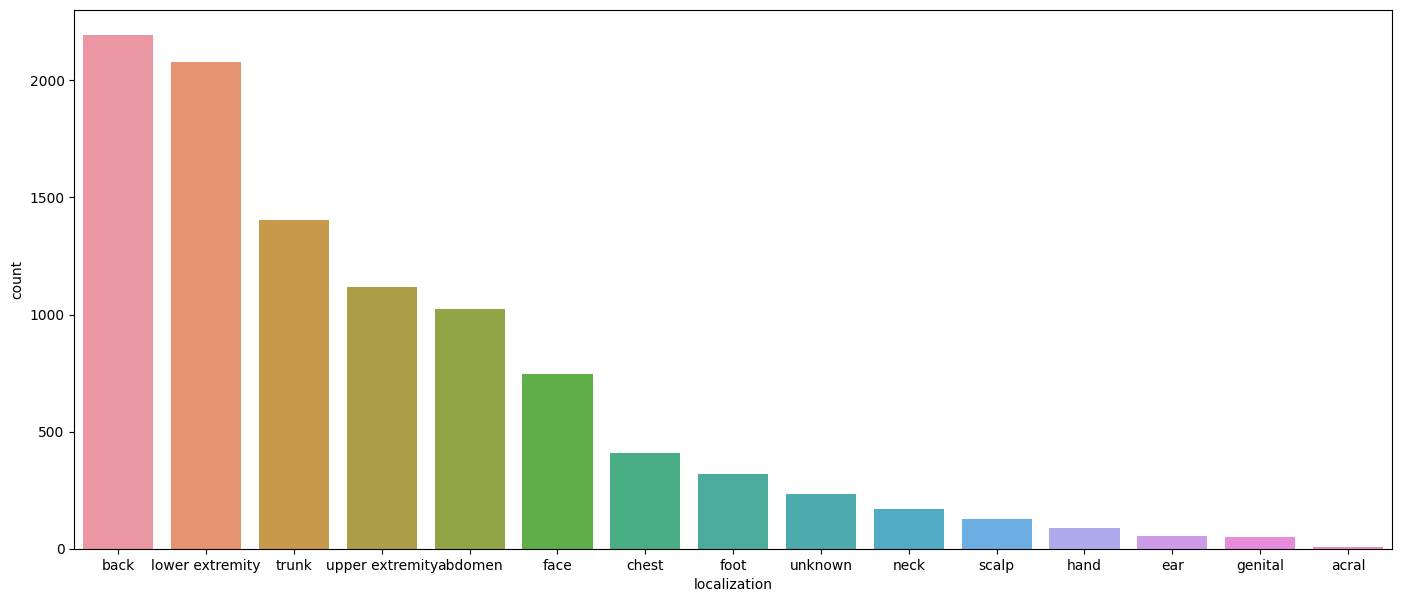

In [34]:
fig, axes = plt.subplots(figsize=(17,7))
res = sns.countplot(x=df['localization'], order=df['localization'].value_counts().index)
plt.show()

In [35]:
df['localization'].value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

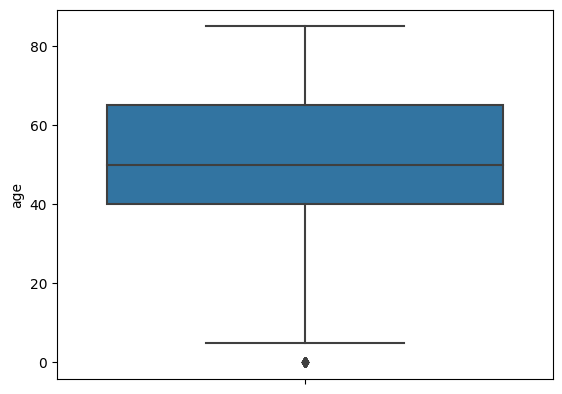

In [36]:
res = sns.boxplot(y=df['age'])
plt.show()

In [37]:
print("Min: ", df['age'].min())
print("Max: ", df['age'].max())

q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)

iqa = q3 - q1 #interquartilsabstand
outliers = df[(df['age']< q1-1.5*iqa) | (df['age']> q3+1.5*iqa)]
print("Ausreißer: ", len(outliers))

Min:  0.0
Max:  85.0
Ausreißer:  39


In [38]:
missing_values_age = df['age'].isna()
count_age = 0

for value in missing_values_age:
    if value:
        count_age += 1


## Erkennung von Outliers


In [39]:
sex_var = df['sex'].unique()
print(sex_var)
count_sex_unknown = 0

for value in df['sex']:
    if value == 'unknown':
        count_sex_unknown += 1


['male' 'female' 'unknown']


In [40]:
localization_var = df['localization'].unique()
print(localization_var)
count_local_unknown = 0

for value in df['localization']:
  if value == 'unknown':
    count_local_unknown += 1

['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


In [41]:
print("Anzahl fehlender Werte in der 'age'-Spalte:", count_age)
print("Anzahl unbekannter Geschlechter:", count_sex_unknown)
print("Anzahl unbekannter Regionen: ", count_local_unknown)

Anzahl fehlender Werte in der 'age'-Spalte: 57
Anzahl unbekannter Geschlechter: 57
Anzahl unbekannter Regionen:  234


### Korrelation & One Hote Encoded Data


In [42]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['dx', 'localization'])

correlation_matrix = one_hot_encoded_data.corr(method='pearson')

print(correlation_matrix)

                                   age  dx_akiec    dx_bcc    dx_bkl  \
age                           1.000000  0.159258  0.205757  0.256490   
dx_akiec                      0.159258  1.000000 -0.042732 -0.064502   
dx_bcc                        0.205757 -0.042732  1.000000 -0.081660   
dx_bkl                        0.256490 -0.064502 -0.081660  1.000000   
dx_df                         0.007515 -0.019801 -0.025068 -0.037839   
dx_mel                        0.184117 -0.064962 -0.082243 -0.124142   
dx_nv                        -0.451109 -0.261482 -0.331041 -0.499688   
dx_vasc                      -0.003478 -0.022033 -0.027894 -0.042105   
localization_abdomen         -0.058101 -0.052654 -0.051502 -0.074031   
localization_acral           -0.023011 -0.004859 -0.006151 -0.009285   
localization_back             0.020633 -0.057845  0.080439 -0.029776   
localization_chest            0.019031 -0.003668  0.059842  0.047466   
localization_ear              0.018253  0.008827 -0.017441 -0.00

<ipython-input-42-6dba9959e2a4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = one_hot_encoded_data.corr(method='pearson')


In [43]:
c = one_hot_encoded_data.corr(method='pearson').abs()
s = c.unstack()
correlation_matrix_so = s[s > 0.2].sort_values()
print(correlation_matrix_so)

age                           dx_bcc                          0.205757
dx_bcc                        age                             0.205757
localization_trunk            localization_lower extremity    0.206547
localization_lower extremity  localization_trunk              0.206547
localization_back             localization_trunk              0.213742
localization_trunk            localization_back               0.213742
age                           dx_bkl                          0.256490
dx_bkl                        age                             0.256490
dx_nv                         dx_akiec                        0.261482
dx_akiec                      dx_nv                           0.261482
localization_back             localization_lower extremity    0.270767
localization_lower extremity  localization_back               0.270767
localization_face             dx_bkl                          0.288835
dx_bkl                        localization_face               0.288835
locali

<ipython-input-43-0a4a073b497a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = one_hot_encoded_data.corr(method='pearson').abs()


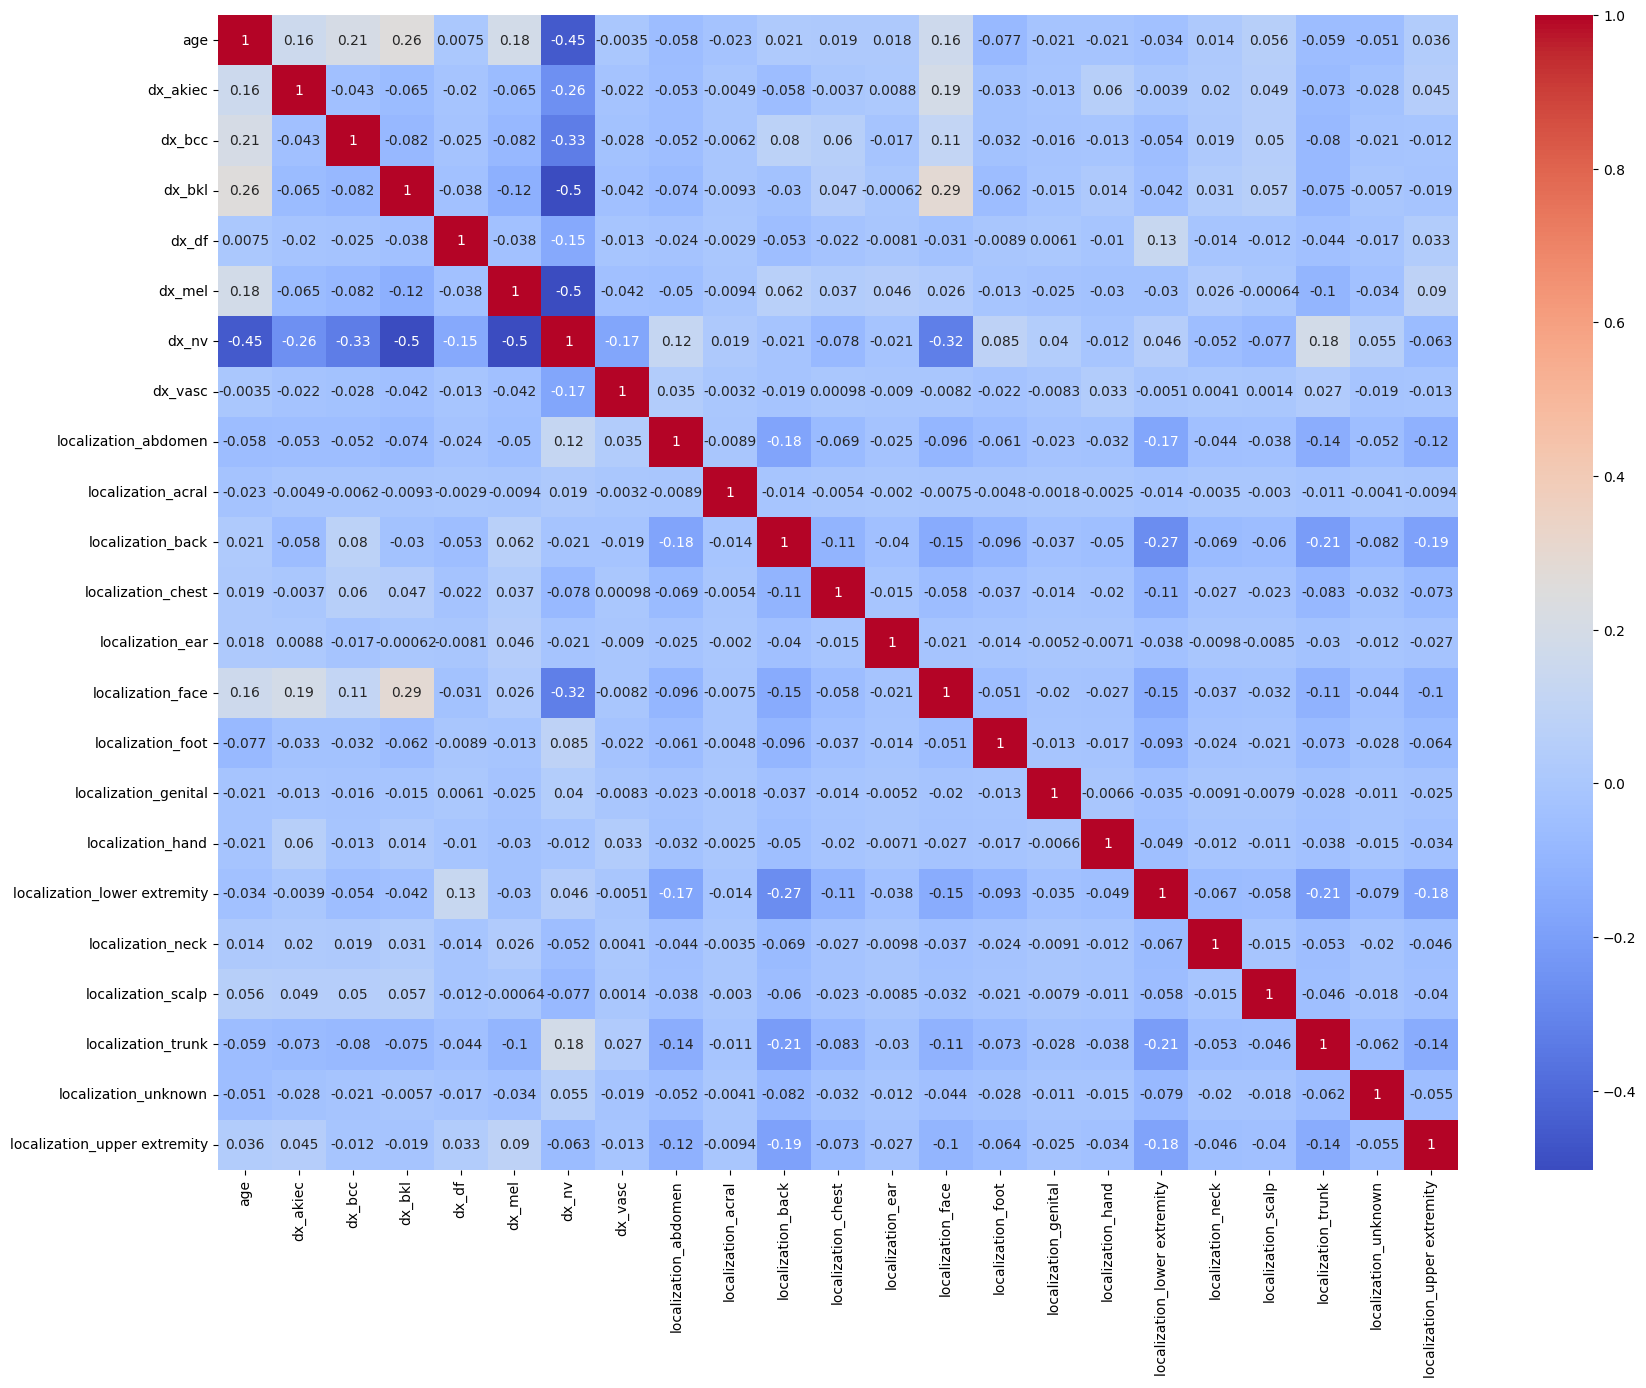

In [30]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()